# __팀원__
> 2015-16294 김호연<br/>
> 2019-10056 김예진<br/>
> 2020-19088 이혜인<br/>
> 2019-18791 박성현<br/>
> 2019-13709 박나은


# 프로젝트 주제: __서울대학교 강의 데이터 분석 및 시각화__
> 수업교시, 교과구분, 수업정원, 수강신청인원을 중심으로

데이터 소스: 서울대학교 수강신청 사이트 (https://sugang.snu.ac.kr/)

# 필요한 라이브러리 import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import matplotlib as mpl
import seaborn as sns
from collections import OrderedDict
import warnings

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,8)
parameters = {'axes.labelsize': 20, 'axes.titlesize': 30, 'figure.titlesize':35}
plt.rcParams.update(parameters)
warnings.filterwarnings(action='ignore')

## 글꼴 설치 및 설정

In [ ]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
sys_font=fm.findSystemFonts()
sys_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanu

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

시각화 시 한글 글꼴이 깨지는 것을 방지하기 위해 글꼴 설치 및 설정을 진행했습니다.

# 데이터 불러오기

In [ ]:
raw_df = pd.read_excel('/content/drive/MyDrive/2020_2/컴퓨팅기초/컴퓨팅 기초 기말 프로젝트/2020_fall.xls')
raw_df.head()

,교과구분,개설대학,개설학과,이수과정,학년,교과목번호,강좌번호,교과목명,부제명,학점,강의,실습,수업교시,수업형태,"강의실(동-호)(#연건, *평창)",주담당교수,정원,수강신청인원,비고,강의언어,개설상태
0,교양,인문대학,중어중문학과,학사,1학년,032.011,4,초급중국어 2,NaN,3,3,1,화(15:30~16:45)/화(17:00~17:50)/목(15:30~16:45),이론/실습반1/이론,003-107/008-302/003-107,허윤정,20 (20),7,"수강제한 관련 수강편람 필독, 랩수업 있음(주당 1시간)",한국어,설강
1,교양,기초교육원,NaN,학사,1학년,031.002,1,인문학글쓰기,NaN,3,3,0,화(15:30~16:45)/목(15:30~16:45),이론/이론,043-1-403/043-1-403,김재호,25 (25),19,®2018학번 포함 이전학번 수강가능,한국어,설강
2,교양,기초교육원,NaN,학사,1학년,031.003,1,사회과학글쓰기,NaN,3,3,0,화(15:30~16:45)/목(15:30~16:45),이론/이론,083-502/083-502,정지웅,25 (25),20,®2018학번 포함 이전학번 수강가능,한국어,설강
3,교양,기초교육원,NaN,학사,1학년,031.031,2,말하기와 토론,NaN,3,3,0,월(11:00~12:15)/수(11:00~12:15),이론/이론,043-1-303/043-1-303,김종영,25 (25),17,<초안지 미수용>,한국어,설강
4,교양,기초교육원,NaN,학사,1학년,031.031,3,말하기와 토론,NaN,3,3,0,월(14:00~15:15)/수(14:00~15:15),이론/이론,043-1-303/043-1-303,김종영,25 (25),22,<초안지 미수용>,한국어,설강


# 전처리

- __사용할 컬럼 정의__: <br/>
교과구분, 개설대학, 이수과정, 교과목번호, 강좌번호, 교과목명, 학점, 수업교시, 정원, 수강신청인원

In [ ]:
# 사용하는 컬럼만 불러와 df에 저장
df = raw_df[['교과구분','개설대학','이수과정','교과목번호','강좌번호','교과목명','학점','수업교시','정원','수강신청인원']]
df.head() # 데이터 형태 확인

,교과구분,개설대학,이수과정,교과목번호,강좌번호,교과목명,학점,수업교시,정원,수강신청인원
0,교양,인문대학,학사,032.011,4,초급중국어 2,3,화(15:30~16:45)/화(17:00~17:50)/목(15:30~16:45),20 (20),7
1,교양,기초교육원,학사,031.002,1,인문학글쓰기,3,화(15:30~16:45)/목(15:30~16:45),25 (25),19
2,교양,기초교육원,학사,031.003,1,사회과학글쓰기,3,화(15:30~16:45)/목(15:30~16:45),25 (25),20
3,교양,기초교육원,학사,031.031,2,말하기와 토론,3,월(11:00~12:15)/수(11:00~12:15),25 (25),17
4,교양,기초교육원,학사,031.031,3,말하기와 토론,3,월(14:00~15:15)/수(14:00~15:15),25 (25),22


프로젝트에 사용되는 컬럼을 지정하여 `df`라는 DataFrame에 저장했습니다.

In [ ]:
# 데이터 타입 및 컬럼별 데이터 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7293 entries, 0 to 7292
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   교과구분    7293 non-null   object
 1   개설대학    7291 non-null   object
 2   이수과정    7293 non-null   object
 3   교과목번호   7293 non-null   object
 4   강좌번호    7293 non-null   int64 
 5   교과목명    7293 non-null   object
 6   학점      7293 non-null   int64 
 7   수업교시    4882 non-null   object
 8   정원      7293 non-null   object
 9   수강신청인원  7293 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 569.9+ KB


In [ ]:
print('='*50)
print('컬럼별 데이터 타입')
print('='*50)
print(df.dtypes)
print()
print('='*50)
print('컬럼별 결측치 개수 확인')
print('='*50)
print(df.isna().sum())

컬럼별 데이터 타입
교과구분      object
개설대학      object
이수과정      object
교과목번호     object
강좌번호       int64
교과목명      object
학점         int64
수업교시      object
정원        object
수강신청인원     int64
dtype: object

컬럼별 결측치 개수 확인
교과구분         0
개설대학         2
이수과정         0
교과목번호        0
강좌번호         0
교과목명         0
학점           0
수업교시      2411
정원           0
수강신청인원       0
dtype: int64


컬럼별 데이터 타입과 결측치의 개수를 보기 쉽게 출력해보았습니다. 이를 통해 결측치 개수는 개설대학 컬럼에서 2개, 수업교시 컬럼에서 2411개임을 확인했습니다.


In [ ]:
# 개설대학이 누락된 행 확인
df[df['개설대학'].isnull()]

,교과구분,개설대학,이수과정,교과목번호,강좌번호,교과목명,학점,수업교시,정원,수강신청인원
4051,일선,NaN,학사,M2571.000200,1,안전 및 조직관리 사례연구(군사학),3,수(08:00~09:50)/목(08:00~09:50),40 (40),12
4052,일선,NaN,학사,M2571.000400,1,조직리더십 사례연구(군사학),3,수(08:00~09:50)/목(08:00~09:50),40 (40),17


개설대학 값이 누락된 행을 확인해본 결과, ROTC 생도라는 특정한 학생들만 듣는 강의로 확인되어 이를 제거해주도록 하겠습니다.

In [ ]:
# 개설대학이 누락된 행 제거
df = df[df['개설대학'].notnull()]

In [ ]:
# 수업교시가 누락된 행 제거
df = df[df['수업교시'].notnull()]

본 프로젝트에서 수업교시는 꼭 필요한 컬럼이고, 이 값을 일일히 찾아 채울 수 없기 때문에 결측치가 존재하는 행을 모두 제거했습니다.

In [ ]:
# 이수과정 목록 확인
df['이수과정'].unique()

array(['학사', '박사', '석사', '석박사통합'], dtype=object)

In [ ]:
# 이수과정별 데이터 개수 확인
df['이수과정'].value_counts()

학사       3088
석박사통합    1426
석사        240
박사        126
Name: 이수과정, dtype: int64

본 프로젝트의 목표는 학부 수업에 해당하는 강의의 분포를 확인하는 것이므로 이수 과정이 학사가 아닌 수업을 제거해주고자 합니다. 또한 이수과정이 학사에 해당하는 데이터의 개수가 충분히 많음을 확인했습니다.


In [ ]:
# 이수과정이 학사에 해당하는 수업만 df에 저장
df = df[df['이수과정']=='학사']

개설대학에서 결측치를 제거해주었지만, 의학계열에 해당하는 특정 단과대학의 경우 전공 과목의 수업시간이 고정되어 있기 때문에 이 값은 본 프로젝트에 의미가 없다고 판단되어 제거해주고자 합니다.

In [ ]:
# 개설대학 목록 확인
df['개설대학'].unique()

array(['인문대학', '기초교육원', '자연과학대학', '사범대학', '공과대학', '경영대학', '미술대학', '음악대학',
       '사회과학대학', '농업생명과학대학', '생활과학대학', '의과대학', '약학대학', '치의학대학원', '보건대학원',
       '환경대학원', '수의과대학', '간호대학', '자유전공학부', '법학전문대학원'], dtype=object)

개설대학 목록을 확인해 본 결과, 의학계열에 해당하는 단과대학으로는 의과대학, 약학대학, 치의학대학원, 보건대학원, 수의과대학, 간호대학이 있었습니다. 각 단과대학별로 교과구분이 전공에 해당하는 행을 제거해주고자 합니다.

의과대학

In [ ]:
# 의과대학 강의 중 교과구분 목록 확인
df[df['개설대학']=='의과대학']['교과구분'].unique()

array(['교양', '전선', '전필'], dtype=object)

In [ ]:
medi_df = df[(df['개설대학']=='의과대학')&(df['교과구분']=='교양')]

의과대학 강의 중 교양에 해당하는 강의를 `medi_df`에 저장해주었습니다.

약학대학

In [ ]:
# 약학대학 강의 중 교과구분 목록 확인
df[df['개설대학']=='약학대학']['교과구분'].unique()

array(['교양', '전필', '전선'], dtype=object)

In [ ]:
phar_df = df[(df['개설대학']=='약학대학')&(df['교과구분']=='교양')]

약학대학 강의 중 교양에 해당하는 강의를 `phar_df`에 저장해주었습니다.

치의학대학원

In [ ]:
# 치의학대학원 강의 중 교과구분 목록 확인
df[df['개설대학']=='치의학대학원']['교과구분'].unique()

array(['교양', '전선', '전필'], dtype=object)

In [ ]:
dent_df = df[(df['개설대학']=='치의학대학원')&(df['교과구분']=='교양')]

치의학대학원 강의 중 교양에 해당하는 강의를 `dent_df`에 저장해주었습니다.

보건대학원

In [ ]:
# 보건대학원 강의 중 교과구분 목록 확인
df[df['개설대학']=='보건대학원']['교과구분'].unique()

array(['교양'], dtype=object)

보건대학원의 경우 모든 강의가 교양에 해당하므로 제거해주지 않겠습니다.

수의과대학

In [ ]:
# 수의과대학 강의 중 교과구분 목록 확인
df[df['개설대학']=='수의과대학']['교과구분'].unique()

array(['전필', '전선'], dtype=object)

수의과대학 강의 중 교양에 해당하는 강의가 존재하지 않기 때문에 따로 새로운 변수를 만들지 않았습니다.

간호대학

In [ ]:
# 간호대학 강의 중 교과구분 목록 확인
df[df['개설대학']=='간호대학']['교과구분'].unique()

array(['전필'], dtype=object)

간호대학 강의 중 교양에 해당하는 강의가 존재하지 않기 때문에 따로 새로운 변수를 만들지 않았습니다.

보건대학원을 제외한 의학계열에 속하는 단과대학의 행을 모두 제거한 뒤, 그 중 교양에 해당하는 값을 저장해둔 `medi_df`, `phar_df`, `dent_df` 를 concat하여 프로젝트에 사용할 최종 DataFrame을 만들어줍니다.

In [ ]:
# 보건대학원 제외 의학계열 단과대학 제거
df = df[(df['개설대학']!='의과대학')&(df['개설대학']!='약학대학')&(df['개설대학']!='치의학대학원')&(df['개설대학']!='수의과대학')&(df['개설대학']!='간호대학')]

In [ ]:
# 의학계열 단과대학의 교양 수업 concat
df = pd.concat([df,medi_df,phar_df,dent_df])

In [ ]:
# 교과목명을 기준으로 행 정렬
df.sort_values(by='교과목명',inplace=True)

In [ ]:
# index reset
df.reset_index(drop=True,inplace=True)

최종 df를 교과목명을 기준으로 정렬해준 뒤 인덱스를 재설정해주었습니다.

In [ ]:
# 데이터 타입 확인
df.dtypes

교과구분      object
개설대학      object
이수과정      object
교과목번호     object
강좌번호       int64
교과목명      object
학점         int64
수업교시      object
정원        object
수강신청인원     int64
dtype: object

데이터 타입이 알맞게 설정되어있는지 확인해본 결과, 수치형 자료인 정원이 object로 설정되어 있는 것을 확인했습니다. 이러한 이유는 정원이 '50 (50)'과 같은 '수강가능정원 (재학생TO)'로 이루어져 있기 때문이었습니다. 따라서 이를 수강가능정원만 남기고 수치형 자료로 바꿔주도록 하겠습니다.

In [ ]:
# 괄호에 해당하는 값 제거
for i in range(len(df)):
    df['정원'][i] = df['정원'].str.split()[i][0]

In [ ]:
# 정원 값 변환 결과 확인
df['정원']

0        20
1        40
2        40
3        40
4        15
       ... 
2934     15
2935     15
2936    100
2937     20
2938     20
Name: 정원, Length: 2939, dtype: object

In [ ]:
# 수치형 자료로 변환
df['정원'] = pd.to_numeric(df['정원'])

In [ ]:
# 데이터 타입 확인
df.dtypes

교과구분      object
개설대학      object
이수과정      object
교과목번호     object
강좌번호       int64
교과목명      object
학점         int64
수업교시      object
정원         int64
수강신청인원     int64
dtype: object

수강가능정원과 괄호 사이에 공백이 존재하므로 `split()`을 사용하여 두 값을 분리해주었습니다. 이후 `for문`으로 각 행별 정원의 값을 `split()` 결과로 나온 리스트에서 첫번째 인덱스(0)에 위치하는 수강가능정원으로 바꿔준 뒤, 데이터 타입을 수치형으로 변환해주었습니다.

In [ ]:
# 데이터 형태 확인
df.head()

,교과구분,개설대학,이수과정,교과목번호,강좌번호,교과목명,학점,수업교시,정원,수강신청인원
0,교양,자연과학대학,학사,046.011,1,10억불분자,3,월(14:00~15:15)/수(14:00~15:15),20,16
1,전선,인문대학,학사,M1236.001800,1,17ㆍ18세기 영국시,3,화(15:30~16:45)/목(15:30~16:45),40,11
2,전선,인문대학,학사,M1236.001900,1,18세기 영국소설,3,월(09:30~10:45)/수(09:30~10:45),40,9
3,전선,인문대학,학사,103.214B,1,19세기 미국소설,3,월(14:00~15:15)/수(14:00~15:15),40,14
4,전선,인문대학,학사,104.325B,1,19세기프랑스시,3,화(14:00~15:15)/목(14:00~15:15),15,9


In [ ]:
# 결측치 재확인
df.isna().sum()

교과구분      0
개설대학      0
이수과정      0
교과목번호     0
강좌번호      0
교과목명      0
학점        0
수업교시      0
정원        0
수강신청인원    0
dtype: int64

데이터 형태와 결측치를 재확인한 뒤 전처리 과정을 마쳤습니다.

# 데이터 분석 및 시각화

## 교과구분별

교과구분 column에 해당하는 값을 파악한 뒤, 각 범주에 해당하는 강의의 개수와 상대도수를 파악하였습니다.

In [ ]:
# 교과구분 목록 확인 및 범주별 강의 개수 파악
df['교과구분'].value_counts()

교양    1246
전선    1119
전필     519
교직      54
일선       1
Name: 교과구분, dtype: int64

In [ ]:
# 범주별 강의 개수 상대도수 확인
df['교과구분'].value_counts(normalize=True)

교양    0.423954
전선    0.380742
전필    0.176591
교직    0.018374
일선    0.000340
Name: 교과구분, dtype: float64

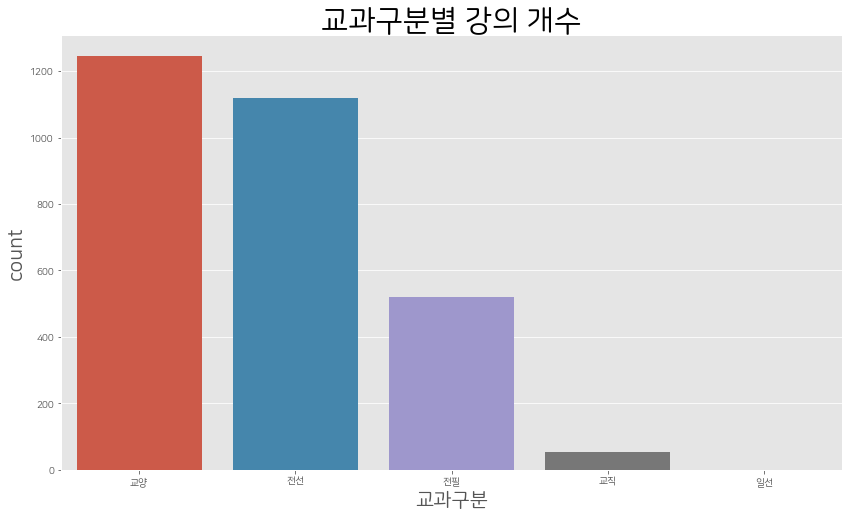

In [ ]:
# 교과구분 범주별 강의 개수 countplot
plt.figure()
sns.countplot(x='교과구분',data=df)
plt.title('교과구분별 강의 개수')
plt.show()

교과구분에 따른 강의의 개수에 차이가 있는지 확인해보았고 이를 `sns.countplot`을 이용하여 시각화해보았습니다. 교양 강의가 가장 많았으며 그 다음으로는 전선, 전필, 교직, 일선 순으로 강의가 많았습니다. 일선에 해당하는 강의는 단 1개 뿐이었습니다.

교과구분에 따라 수강신청인원에 차이가 있는지 알아보고자 `groupby` method를 활용해보았습니다.

In [ ]:
# 교과구분별 수강신청인원 mean, median
print('='*50)
print('교과구분별 수강신청인원 mean')
print('='*50)
print(df.groupby('교과구분')['수강신청인원'].mean())
print()
print('='*50)
print('교과구분별 수강신청인원 median')
print('='*50)
print(df.groupby('교과구분')['수강신청인원'].median())

교과구분별 수강신청인원 mean
교과구분
교양     27.971910
교직     28.074074
일선    293.000000
전선     23.440572
전필     33.100193
Name: 수강신청인원, dtype: float64

교과구분별 수강신청인원 median
교과구분
교양     21.0
교직     27.5
일선    293.0
전선     17.0
전필     24.0
Name: 수강신청인원, dtype: float64


In [ ]:
df[df['교과구분']=='일선']

,교과구분,개설대학,이수과정,교과목번호,강좌번호,교과목명,학점,수업교시,정원,수강신청인원
1184,일선,인문대학,학사,100.165,1,삶과 인문학,1,월(17:00~18:15),330,293


1개 존재하는 일선 강의의 경우 수강신청 인원이 다른 교과구분에 비해 현저히 큰 값을 보여 어떤 강의인지 확인해보았습니다. 그 결과, 인문대학에서 개설되는 삶과 인문학이라는 강의임을 확인할 수 있었고 이 강의만 일선으로 구분되어 있는 이유는 알 수 없지만 이상치로 처리해야 한다고 판단할 수 있었습니다.

교과구분에 따라 정원에 차이가 있는지 알아보고자 위와 같은 방식으로 수강신청인원 대신 정원으로 `groupby` method를 활용하여 분석해보았습니다.

In [ ]:
# 교과구분별 정원 mean, median
print('='*50)
print('교과구분별 정원 mean')
print('='*50)
print(df.groupby('교과구분')['정원'].mean())
print()
print('='*50)
print('교과구분별 정원 median')
print('='*50)
print(df.groupby('교과구분')['정원'].median())

교과구분별 정원 mean
교과구분
교양     37.818620
교직     37.962963
일선    330.000000
전선     38.739946
전필     45.281310
Name: 정원, dtype: float64

교과구분별 정원 median
교과구분
교양     25
교직     40
일선    330
전선     40
전필     40
Name: 정원, dtype: int64


수강신청인원에 비해 정원 값이 모든 범주에 대해 높에 확인됩니다. 이를 `sns.boxplot`과 `sns.violinplot`로 시각화해보았습니다.

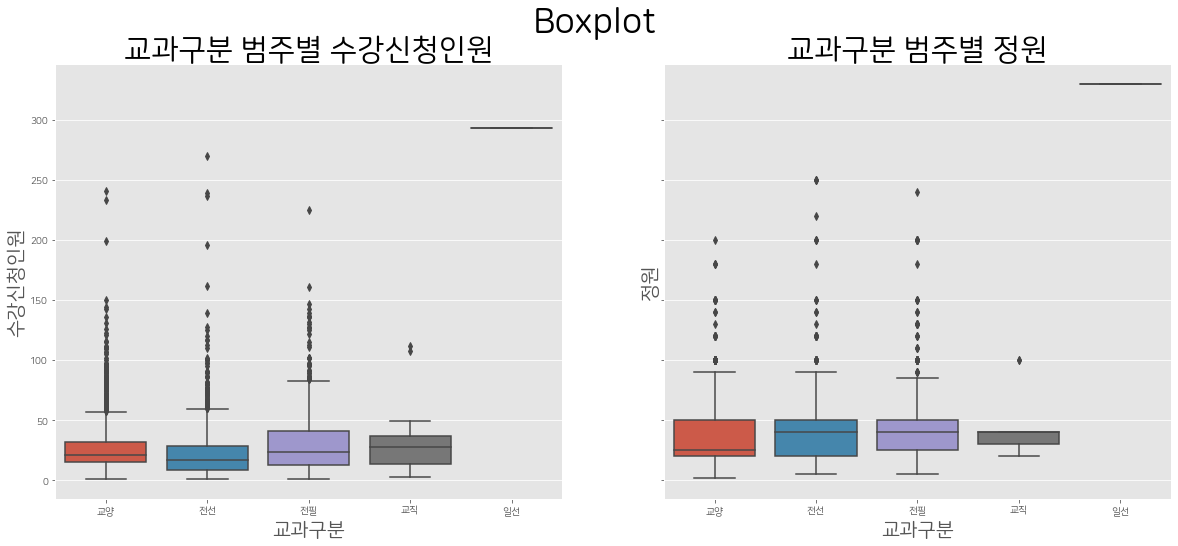

In [ ]:
# 교과구분 범주별 수강신청인원과 정원 시각화(Boxplot)
fig, ax = plt.subplots(1,2,sharey=True,figsize=(20,8))
fig.suptitle('Boxplot')
sns.boxplot(ax=ax[0],x='교과구분',y='수강신청인원',data=df)
sns.boxplot(ax=ax[1],x='교과구분',y='정원',data=df)
ax[0].set_title('교과구분 범주별 수강신청인원')
ax[1].set_title('교과구분 범주별 정원')
plt.show()

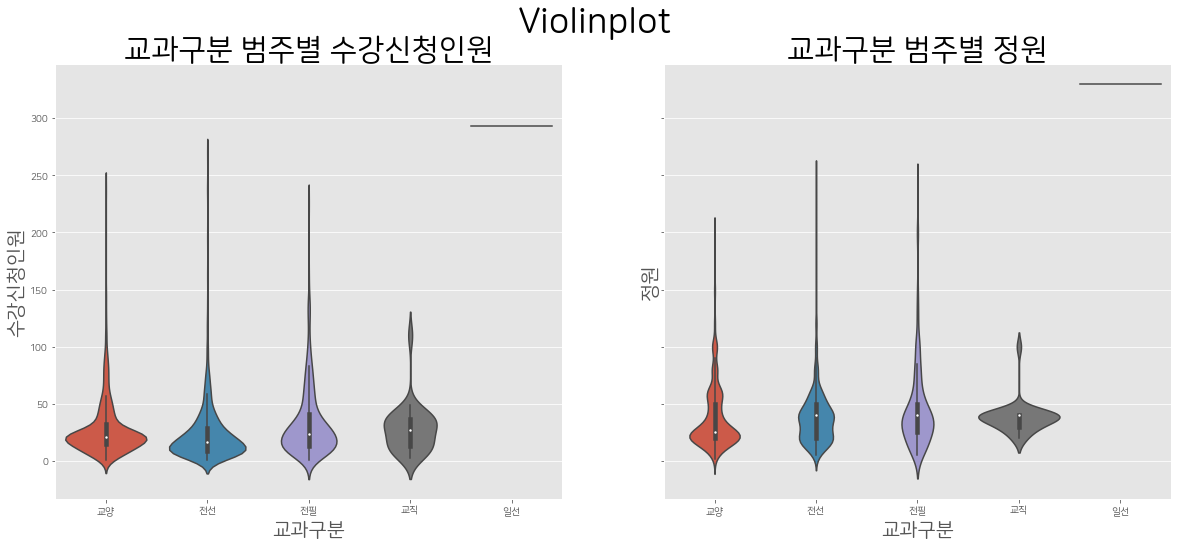

In [ ]:
# 교과구분 범주별 수강신청인원과 정원 시각화(violinplot)
fig, ax = plt.subplots(1,2,sharey=True,figsize=(20,8))
fig.suptitle('Violinplot')
sns.violinplot(ax=ax[0],x='교과구분',y='수강신청인원',data=df)
sns.violinplot(ax=ax[1],x='교과구분',y='정원',data=df)
ax[0].set_title('교과구분 범주별 수강신청인원')
ax[1].set_title('교과구분 범주별 정원')
plt.show()

교과구분별 수강신청인원과 정원의 평균값을 알아보고, 각각에 대해 `boxplot`과 `violinplot`을 그려보았습니다. <br/>
일선의 경우를 제외한 교과구분에서 수강신청인원의 평균에 큰 차이가 없었고 분포 또한 비슷함을 확인할 수 있었습니다. 일선을 제외하고는 전필에서 수강신청인원 평균수가 제일 큰 값을 보였고, 전선에서 수강신청인원 Max가 제일 큰 값을 보였습니다.<br/>
교과구분별 정원의 평균 또한 일선의 경우를 제외하고는 전필의 경우 가장 높은 값을 보였으며 그 외 범주에서는 비슷한 값을 보였습니다. 수강신청인원과 마찬가지로 전선에서 정원의 Max가 제일 큰 값을 보였습니다.<br/>
수강신청인원과 정원 그래프를 비교해보았을 때, 형태상의 차이를 발견할 수 있었습니다. 그 이유는 정원이 다 채워지지 않았기 때문으로 추측됩니다. `boxplot`의 median이 수강신청인원의 경우 정원보다 전반적으로 내려가 있는 것을 알 수 있습니다. 더불어 실제 수강신청인원은 정원보다 비슷비슷한 값으로 수렴되는 경향성을 볼 수 있었고 이는 `violinplot`에서 보다 명확하게 파악할 수 있었습니다.

## 개설대학별

In [ ]:
# 개설대학별 강의 개수 확인
df['개설대학'].value_counts()

인문대학        805
자연과학대학      473
사범대학        371
공과대학        349
사회과학대학      183
농업생명과학대학    165
기초교육원       153
미술대학        149
음악대학        126
경영대학         67
생활과학대학       56
자유전공학부       27
법학전문대학원       6
의과대학          5
치의학대학원        1
보건대학원         1
약학대학          1
환경대학원         1
Name: 개설대학, dtype: int64

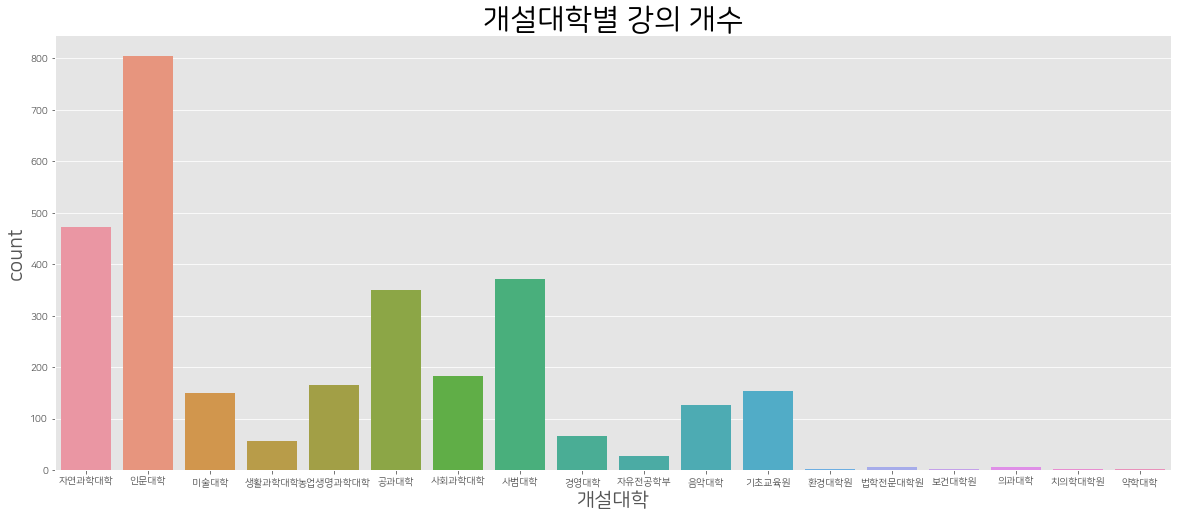

In [ ]:
# 개설대학별 강의 개수 시각화(countplot)
plt.figure(figsize=(20,8))
sns.countplot(x='개설대학',data=df)
plt.title('개설대학별 강의 개수')
plt.show()

개설대학에 따른 강의의 개수에 차이가 있는지 확인해보았고 이를 `sns.countplot`을 이용하여 시각화해보았습니다. 인문대학의 강의가 가장 많았으며 그 다음으로는 자연과학대학, 사범대학 순으로 강의가 많음을 확인할 수 있었습니다. 그리고 약학대학, 환경대학원, 보건대학원, 치의학대학원에서 개설되는 강의는 1개 뿐이었습니다.

In [ ]:
# 개설대학별 교과구분별 강의 개수 확인
df.groupby(['개설대학','교과구분']).count()

이수과정  교과목번호  강좌번호  교과목명   학점  수업교시   정원  수강신청인원
개설대학     교과구분                                                 
경영대학     교양       2      2     2     2    2     2    2       2
         전선      31     31    31    31   31    31   31      31
         전필      34     34    34    34   34    34   34      34
공과대학     교양       9      9     9     9    9     9    9       9
         전선     195    195   195   195  195   195  195     195
         전필     145    145   145   145  145   145  145     145
기초교육원    교양     153    153   153   153  153   153  153     153
농업생명과학대학 교양       4      4     4     4    4     4    4       4
         전선      82     82    82    82   82    82   82      82
         전필      79     79    79    79   79    79   79      79
미술대학     교양      12     12    12    12   12    12   12      12
         전선     119    119   119   119  119   119  119     119
         전필      18     18    18    18   18    18   18      18
법학전문대학원  교양       6      6     6     6    6     6    6       6
보건대학원    교양       1      1     1     1    1     1    1       1
사범대학     교양     105    105   105   105  105   105  105     105
         교직      54     54    54    54   54    54   54      54
         전선     141    141   141   141  141   141  141     141
         전필      71     71    71    71   71    71   71      71
사회과학대학   교양      34     34    34    34   34    34   34      34
         전선     118    118   118   118  118   118  118     118
         전필      31     31    31    31   31    31   31      31
생활과학대학   교양       3      3     3     3    3     3    3       3
         전선      53     53    53    53   53    53   53      53
약학대학     교양       1      1     1     1    1     1    1       1
음악대학     교양       7      7     7     7    7     7    7       7
         전선      35     35    35    35   35    35   35      35
         전필      84     84    84    84   84    84   84      84
의과대학     교양       5      5     5     5    5     5    5       5
인문대학     교양     575    575   575   575  575   575  575     575
         일선       1      1     1     1    1     1    1       1
         전선     208    208   208   208  208   208  208     208
         전필      21     21    21    21   21    21   21      21
자연과학대학   교양     327    327   327   327  327   327  327     327
         전선     110    110   110   110  110   110  110     110
         전필      36     36    36    36   36    36   36      36
자유전공학부   전선      27     27    27    27   27    27   27      27
치의학대학원   교양       1      1     1     1    1     1    1       1
환경대학원    교양       1      1     1     1    1     1    1       1

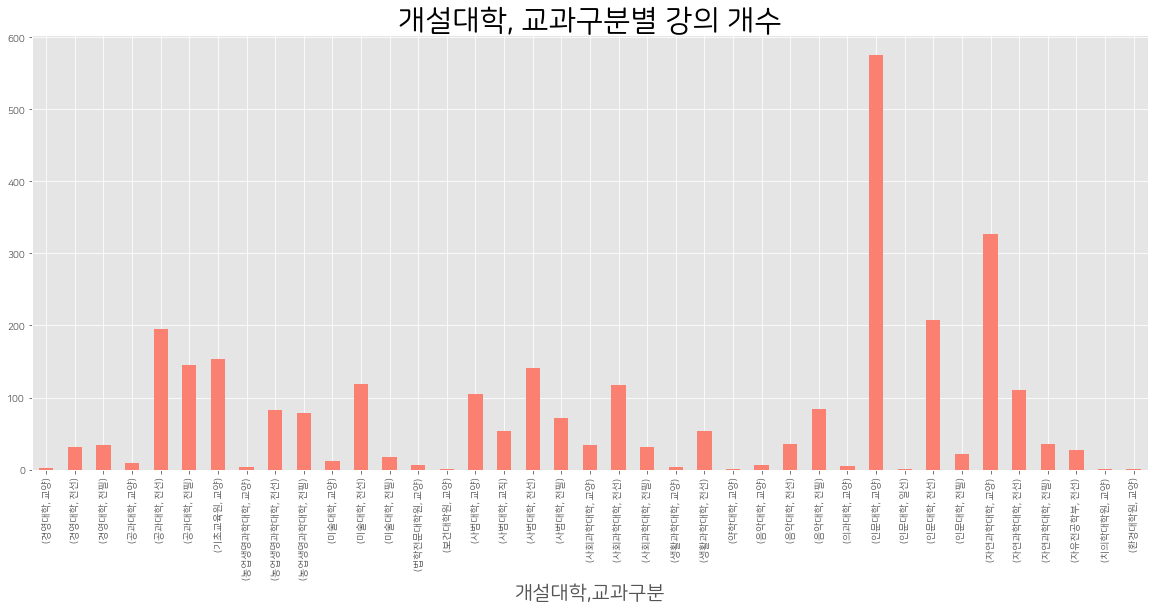

In [ ]:
# 개설대학별 교과구분별 강의 개수 시각화(barplot)
plt.figure(figsize=(20,8))
df.groupby(['개설대학','교과구분']).count()['이수과정'].plot(kind='bar',color='salmon')
plt.title('개설대학, 교과구분별 강의 개수')
plt.show()

`groupby()` method를 통해 개설대학, 교과구분별 강의 개수를 확인해보았고, 이를 막대그래프로 시각화해보았습니다. 인문대학의 교양 강의가 가장 많았고, 그 다음으로는 자연과학대학의 교양, 인문대학의 전선, 공과대학의 전선 순으로 강의가 많았습니다.

In [ ]:
# 교과구분별 수강신청인원 mean, median
print('='*50)
print('개설대학별 수강신청인원 mean')
print('='*50)
print(df.groupby('개설대학')['수강신청인원'].mean().sort_values())
print()
print('='*50)
print('개설대학별 수강신청인원 median')
print('='*50)
print(df.groupby('개설대학')['수강신청인원'].median().sort_values())

개설대학별 수강신청인원 mean
개설대학
미술대학        15.167785
자유전공학부      15.592593
농업생명과학대학    20.157576
환경대학원       22.000000
사범대학        22.803235
인문대학        22.822360
기초교육원       23.333333
자연과학대학      26.737844
음악대학        26.960317
생활과학대학      31.053571
공과대학        35.386819
사회과학대학      49.819672
경영대학        50.223881
치의학대학원      59.000000
법학전문대학원     65.000000
약학대학        75.000000
의과대학        80.800000
보건대학원       97.000000
Name: 수강신청인원, dtype: float64

개설대학별 수강신청인원 median
개설대학
미술대학        12.0
농업생명과학대학    16.0
자유전공학부      17.0
인문대학        19.0
음악대학        20.0
자연과학대학      21.0
사범대학        21.0
환경대학원       22.0
기초교육원       22.0
공과대학        24.0
생활과학대학      28.5
사회과학대학      37.0
경영대학        45.0
법학전문대학원     58.5
치의학대학원      59.0
약학대학        75.0
의과대학        86.0
보건대학원       97.0
Name: 수강신청인원, dtype: float64


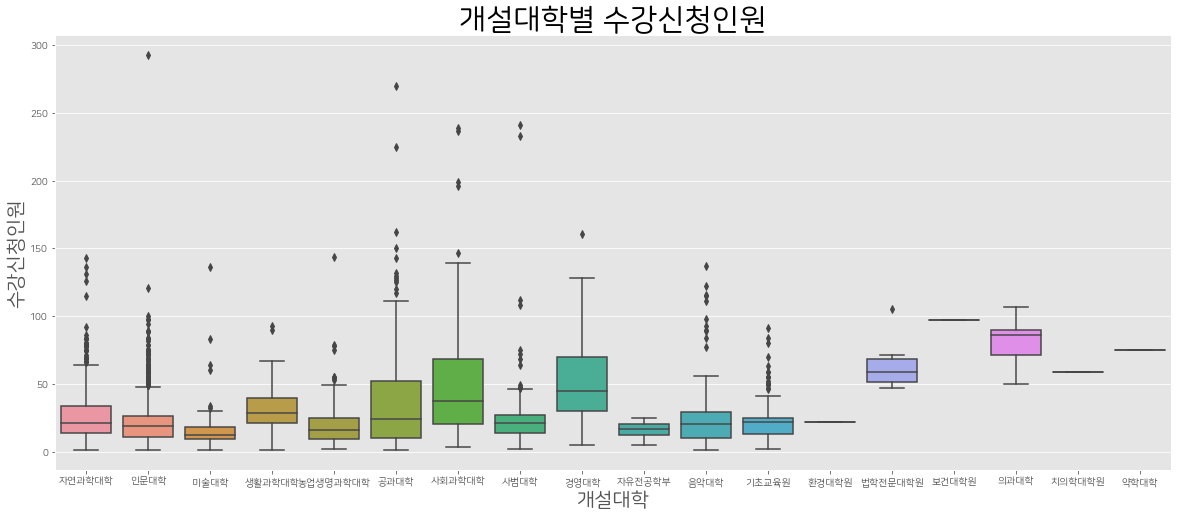

In [ ]:
# 개설대학별 수강신청인원 시각화(boxplot)
plt.figure(figsize=(20,8))
sns.boxplot(x='개설대학',y='수강신청인원',data=df)
plt.title('개설대학별 수강신청인원')
plt.show()

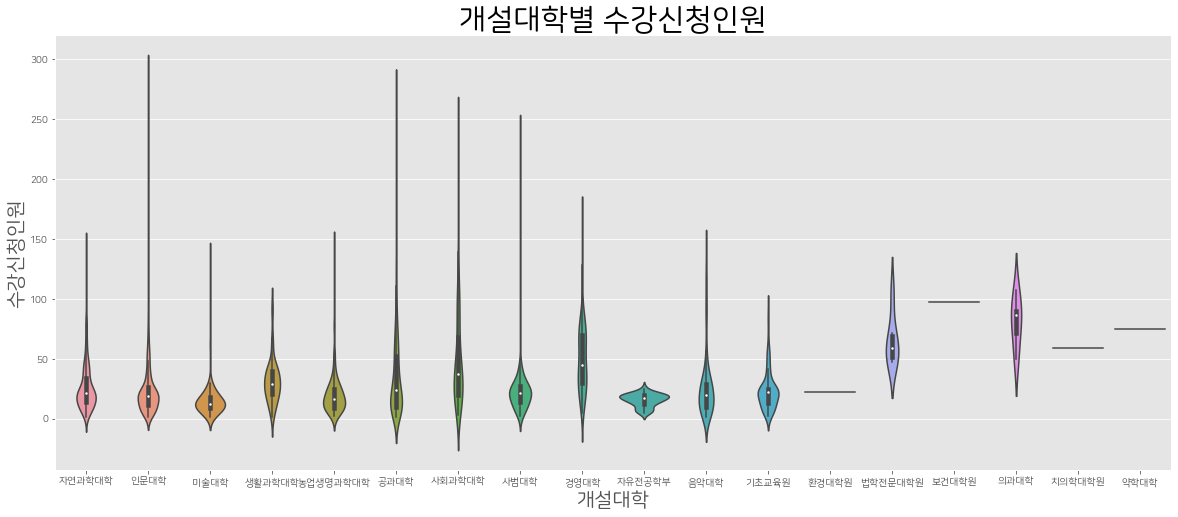

In [ ]:
# 개설대학별 수강신청인원 시각화(violinplot)
plt.figure(figsize=(20,8))
sns.violinplot(x='개설대학',y='수강신청인원',data=df)
plt.title('개설대학별 수강신청인원')
plt.show()

개설대학별 수강신청인원을 파악하고자 mean과 median을 알아보고, `boxplot`과 `violinplot`을 그려보았습니다. 
강의 개수가 1개로 확인된 환경대학원, 보건대학원, 치의학대학원, 약학대학을 제외하고 대부분 오른쪽 꼬리가 긴 분포를 보이고 있습니다.

강의 개수가 10개 미만인 환경대학원, 법학전문대학원, 보건대학원, 의과대학, 치의학대학원, 약학대학원을 제외하면 수강신청인원의 평균은 경영대학, 사회과학대학, 공과대학, 생활과학대학 순으로, 중앙값은 경영대학, 사회과학대학, 생활과학대학, 공과대학 순으로 큰 값을 보이는 것을 확인했습니다. 의과대학, 법학천문대학원 등의 단과대학에서 median이 특히 높게 나타나는 이유는, 해당 단과대의 경우 주로 소규모로 진행될 것으로 예측되는 전공 수업이 제거되어 비교적 중~대형 강의로 진행되는 교양 수업만이 데이터에 포함되어 있기 때문으로 추측할 수 있습니다.

## 교과목명별

In [ ]:
# 교과목명별 강의 개수 확인
df.groupby('교과목명').count()

,교과구분,개설대학,이수과정,교과목번호,강좌번호,학점,수업교시,정원,수강신청인원
교과목명,,,,,,,,,
10억불분자,1,1,1,1,1,1,1,1,1
17ㆍ18세기 영국시,1,1,1,1,1,1,1,1,1
18세기 영국소설,1,1,1,1,1,1,1,1,1
19세기 미국소설,1,1,1,1,1,1,1,1,1
19세기프랑스시,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
회화 2,2,2,2,2,2,2,2,2,2
회화재료와 기법,1,1,1,1,1,1,1,1,1
흔들리는 20대: 청년 심리학,1,1,1,1,1,1,1,1,1


In [ ]:
# 교과목명별 강의 개수의 기술통계량 확인
df.groupby('교과목명').count()['교과구분'].describe()

count    1765.000000
mean        1.665156
std         3.207763
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        73.000000
Name: 교과구분, dtype: float64

In [ ]:
# 교과목명별 강의 개수의 상위 1% 값 확인
df.groupby('교과목명').count().sort_values(by='교과구분',ascending=False)['교과구분'].quantile(0.99)

14.3599999999999

In [ ]:
# 강의 개수가 14개 이상인 강의 목록 및 강의 개수 확인
df.groupby('교과목명').count().sort_values(by='교과구분',ascending=False)[df.groupby('교과목명').count().sort_values(by='교과구분',ascending=False)['교과구분']>=14]

,교과구분,개설대학,이수과정,교과목번호,강좌번호,학점,수업교시,정원,수강신청인원
교과목명,,,,,,,,,
대학 글쓰기 1,73,73,73,73,73,73,73,73,73
대학영어 1,51,51,51,51,51,51,51,51,51
수학연습 2,41,41,41,41,41,41,41,41,41
신입생세미나,34,34,34,34,34,34,34,34,34
물리학실험 2,32,32,32,32,32,32,32,32,32
수학 2,26,26,26,26,26,26,26,26,26
생물학실험,24,24,24,24,24,24,24,24,24
대학 글쓰기 2: 과학기술글쓰기,22,22,22,22,22,22,22,22,22
화학실험,22,22,22,22,22,22,22,22,22


교과목명별 강의의 수를 살펴보았습니다. 교과목명별로 개설된 강의는 대부분 1개였으며 Max값은 73개임을 확인할 수 있었습니다. 상위 1%에 해당하는 값은 약 14이며, 14개 이상 개설되는 강의는 19개 존재했습니다.

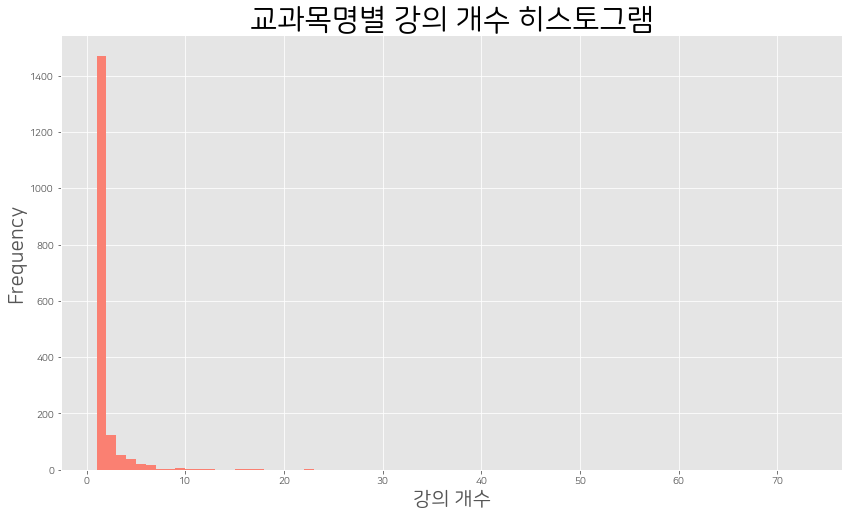

In [ ]:
# 교과목명별 강의 개수 시각화(histogram)
plt.figure()
df.groupby('교과목명').count().sort_values(by='교과구분',ascending=False)['교과구분'].plot(kind='hist',bins=72,color='salmon')
plt.title('교과목명별 강의 개수 히스토그램')
plt.xlabel('강의 개수')
plt.show()

교과목명별 강의 개수는 앞서 확인했듯이 1개가 압도적으로 많음을 볼 수 있다.

## 학점별

In [ ]:
# 학점별 강의 개수 확인
df['학점'].value_counts()

3    1833
2     587
1     489
4      20
6      10
Name: 학점, dtype: int64

In [ ]:
# 학점별 강의 개수 상대도수 확인
df['학점'].value_counts(normalize=True)

3    0.623682
2    0.199728
1    0.166383
4    0.006805
6    0.003403
Name: 학점, dtype: float64

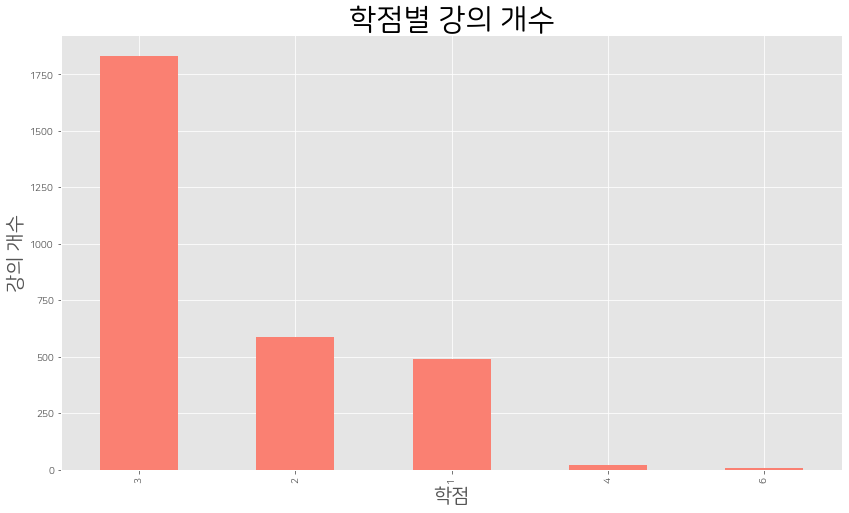

In [ ]:
# 학점별 강의 개수 시각화(barplot)
plt.figure()
df['학점'].value_counts().plot(kind='bar',color='salmon')
plt.title('학점별 강의 개수')
plt.xlabel('학점')
plt.ylabel('강의 개수')
plt.show()

학점별 강의 개수를 확인한 뒤, `barplot`을 이용하여 시각화해 보았습니다. 3학점 강의가 전체 강의의 절반이 넘는 62%를 차지함을 확인할 수 있었습니다.

## 수업교시별

In [ ]:
# 수업교시별 강의 개수 확인
df['수업교시'].value_counts()

화(11:00~12:15)/목(11:00~12:15)                   134
월(11:00~12:15)/수(11:00~12:15)                   130
화(14:00~15:15)/목(14:00~15:15)                   122
월(14:00~15:15)/수(14:00~15:15)                   105
월(09:30~10:45)/수(09:30~10:45)                   102
                                               ... 
수(09:30~11:20)/수(11:30~13:20)                     1
화(14:00~15:15)                                    1
월(14:00~15:15)/수(14:00~15:15)/금(10:00~10:50)      1
목(10:00~11:50)/목(18:00~19:50)                     1
화(12:30~13:45)/목(12:30~13:45)/금(11:00~11:50)      1
Name: 수업교시, Length: 554, dtype: int64

In [ ]:
# 수업교시별 강의 개수의 기술통계량 확인
df['수업교시'].value_counts().describe()

count    554.000000
mean       5.305054
std       14.345986
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      134.000000
Name: 수업교시, dtype: float64

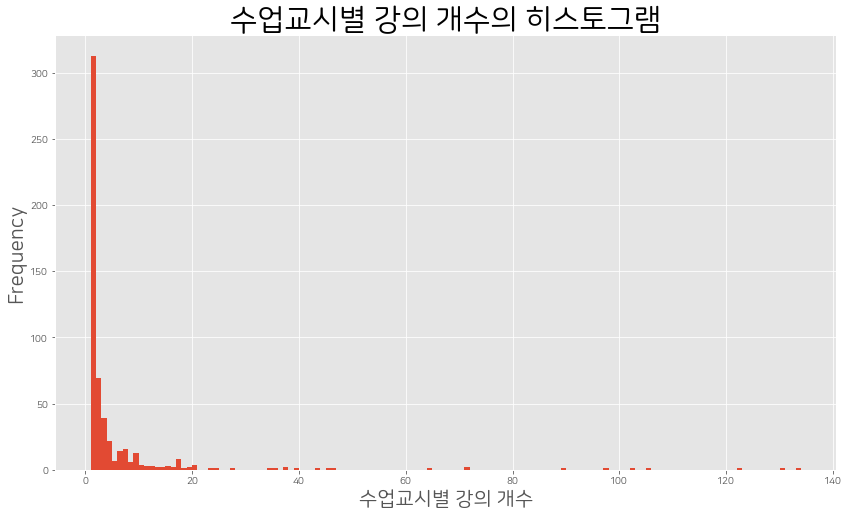

In [ ]:
# 수업교시별 강의 개수 시각화(hist)
plt.figure()
df['수업교시'].value_counts().plot(kind='hist',bins=133)
plt.title('수업교시별 강의 개수의 히스토그램')
plt.xlabel('수업교시별 강의 개수')
plt.show()

수업교시의 범주가 554로 개수가 많기 때문에 이를 시각화하기 위해 각 범주별 강의 개수를 구한 뒤 히스토그램으로 나타내보았습니다. 수업교시 범주별 강의의 개수가 1개인 강의가 압도적으로 많음을 확인할 수 있었습니다.

수업교시 컬럼이 수업요일과 수업시간이 합쳐진 상태로 있기 때문에 이를 분리해 수업요일, 수업횟수, 수업시간이라는 새로운 컬럼을 만들어주었습니다.

In [ ]:
# 수업요일, 수업횟수, 수업시간 컬럼 생성
df['수업교시_list'] = df['수업교시'].str.split('/')
df['수업요일'] = np.nan
df['수업횟수'] = np.nan
df['수업시간'] = np.nan

for i in range(len(df)):
    df['수업횟수'][i] = len(df['수업교시_list'][i])
    for j in range(len(df['수업교시_list'][i])):
        if j == 0:
            df['수업요일'][i] = df['수업교시_list'][i][j][0]
            df['수업시간'][i] = [df['수업교시_list'][i][j][2:-1]]
        else:
            df['수업요일'][i] += df['수업교시_list'][i][j][0]
            df['수업시간'][i] += [df['수업교시_list'][i][j][2:-1]]

In [ ]:
# 수업요일별 강의 개수 확인
df['수업요일'].value_counts()

화목        563
월수        554
금         344
화         278
수         261
목         226
월         226
금금         54
수수         49
월월         38
목목         37
화화         36
월수금        22
화금         17
토          16
화목금        13
월월수수       12
월수수        10
월수금금       10
화목목목       10
화화목목        9
월목          9
목목토         9
월수수수        9
화목목         9
월수목         8
목금          8
화화목         8
월화목         8
월금          7
화화화목        7
화수목         7
월월월수        7
화목금금        7
수금          5
월화수         5
월월수         5
토토          4
월수목목        4
월월목목        3
화화금금        3
화수수목        3
수수토토        3
수목          2
월화          2
월월월수수수      1
금금금         1
월화화수        1
금토          1
수수수수수수      1
월월금         1
수토          1
화화화         1
목목금         1
화수          1
월화화목목       1
금금금금금금      1
Name: 수업요일, dtype: int64

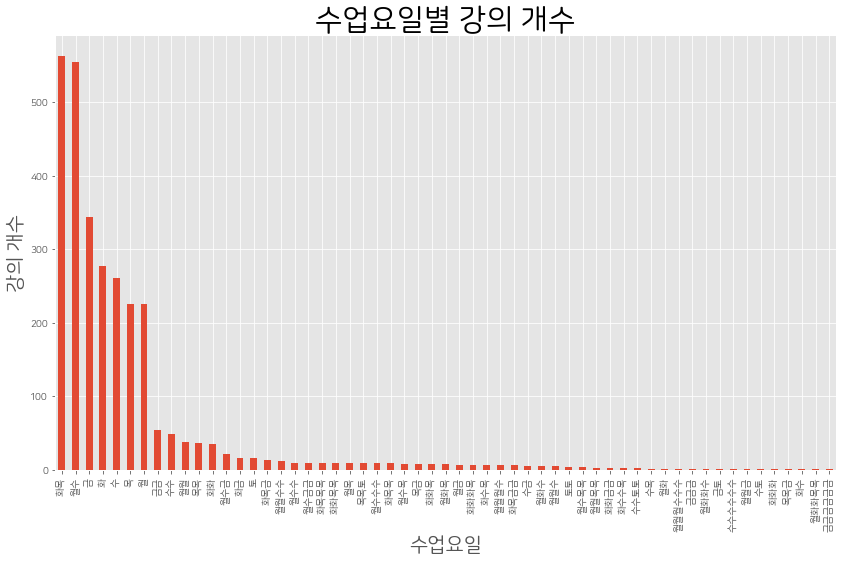

In [ ]:
# 수업요일별 강의 개수 시각화(barplot)
plt.figure()
df['수업요일'].value_counts().plot(kind='bar')
plt.title('수업요일별 강의 개수')
plt.xlabel('수업요일')
plt.ylabel('강의 개수')
plt.show()

단순히 수업요일을 추출해 만든 컬럼으로 강의 개수를 확인해본 결과, 화요일과 목요일에 열리는 강의가 563개로 제일 많았고, 월요일과 수요일에 열리는 강의가 554개, 금요일에 열리는 강의가 344개였습니다.

단순히 수업요일을 추출한 결과는 월요일 2번, 수요일 2번에 걸쳐 이루어지는 강의의 경우 월요일 1번, 수요일 1번에 걸쳐 이루어지는 수업과 다르게 집계되므로 이러한 경우를 합쳐 수업요일_unique라는 새로운 컬럼을 만들어줄 것입니다.

In [ ]:
# unique한 수업 요일 컬럼 생성 (중복된 수업요일 하나로 합친 컬럼)
df['수업요일_unique'] = np.nan
for i in range(len(df)):
    df['수업요일_unique'][i] = ''.join(OrderedDict.fromkeys(df['수업요일'][i]))

In [ ]:
# unique한 수업요일 범주별 강의 개수
df['수업요일_unique'].value_counts()

화목     606
월수     598
금      400
화      315
수      311
월      264
목      263
월수금     32
화금      20
화목금     20
토       20
월목      12
월수목     12
화수목     10
목금       9
월화목      9
목토       9
월금       8
월화수      6
수금       5
수토       4
수목       2
월화       2
화수       1
금토       1
Name: 수업요일_unique, dtype: int64

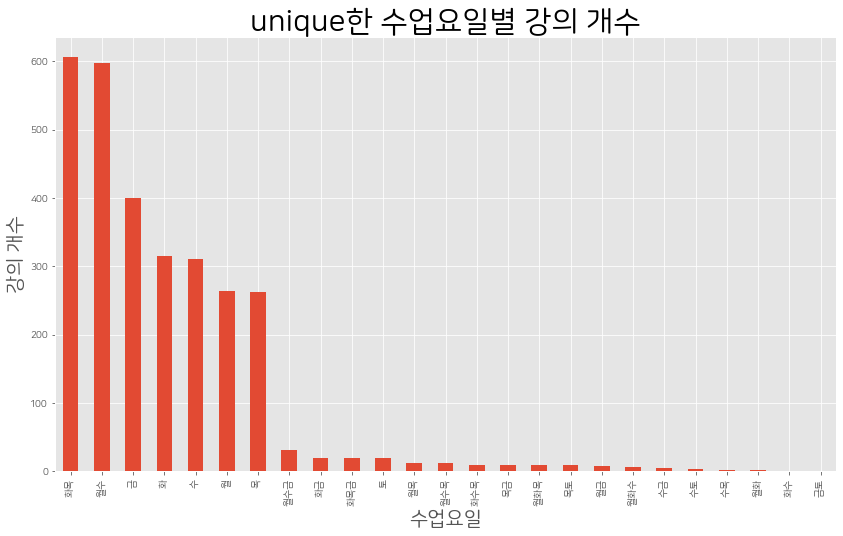

In [ ]:
# unique한 수업요일 범주별 강의 개수 시각화(barplot)
plt.figure()
df['수업요일_unique'].value_counts().plot(kind='bar')
plt.title('unique한 수업요일별 강의 개수')
plt.xlabel('수업요일')
plt.ylabel('강의 개수')
plt.show()

unique한 수업요일별 강의 개수를 확인해본 결과, 단순 수업요일별 강의 개수와 비슷한 결과를 보였습니다.

화목 강의가 가장 많았고, 그 다음으로는 월수 강의, 금 강의순으로 강의 개수가 많았습니다.

각 강의의 수업횟수는 어떻게 되는지 위에서 생성한 수업횟수 컬럼으로 확인, 시각화를 진행해보았습니다.

In [ ]:
# 수업횟수별 강의 개수 확인
df['수업횟수'].value_counts()

2.0    1388
1.0    1351
3.0     108
4.0      88
6.0       3
5.0       1
Name: 수업횟수, dtype: int64

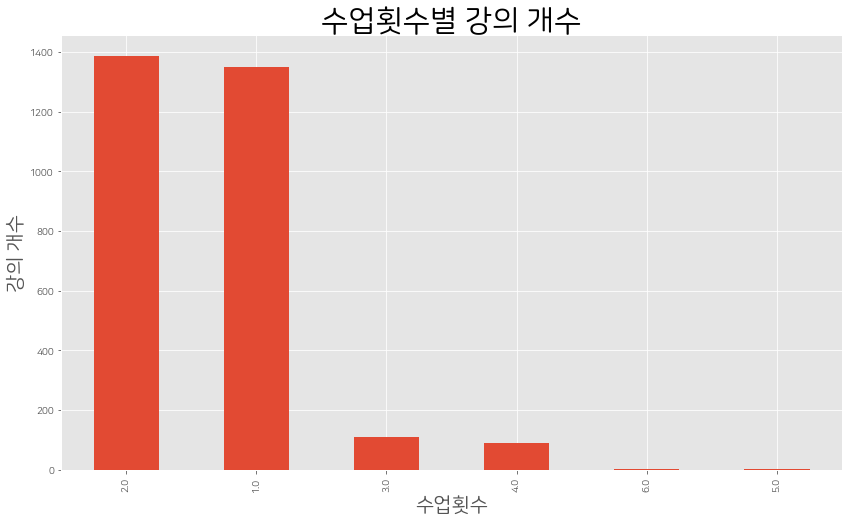

In [ ]:
# 수업횟수별 강의 개수 시각화(barplot)
plt.figure()
df['수업횟수'].value_counts().plot(kind='bar')
plt.title('수업횟수별 강의 개수')
plt.xlabel('수업횟수')
plt.ylabel('강의 개수')
plt.show()

주 2회로 수업하는 경우가 가장 많았고, 그 다음으로는 주 1회 수업하는 경우가 뒤를 이었다. 이 두 경우가 전체 중 가장 압도적인 비율을 차지하고 있습니다.

In [ ]:
# 전체 수업의 모든 강의시간 리스트에 저장
lecture_time = []

for i in range(len(df)):
    lecture_time += df['수업시간'][i]

In [ ]:
# 강의시간 범주별 개수 count
time_count= {}

for x in lecture_time:
    try: time_count[x] += 1
    except: time_count[x] = 1
    
time_count

{'08:30~09:20': 1,
 '09:00~09:50': 30,
 '09:00~10:15': 2,
 '09:00~10:50': 87,
 '09:00~11:50': 43,
 '09:00~12:50': 29,
 '09:00~14:50': 6,
 '09:30~10:20': 2,
 '09:30~10:45': 443,
 '09:30~11:20': 6,
 '09:30~12:20': 73,
 '10:00~10:50': 48,
 '10:00~11:15': 2,
 '10:00~11:50': 85,
 '10:00~12:50': 119,
 '10:00~13:50': 6,
 '10:30~11:45': 4,
 '10:30~12:20': 1,
 '10:30~13:20': 2,
 '10:30~14:20': 1,
 '11:00~11:50': 39,
 '11:00~12:15': 589,
 '11:00~12:50': 155,
 '11:00~13:20': 1,
 '11:00~13:50': 22,
 '11:30~13:20': 3,
 '12:00~12:50': 23,
 '12:00~13:50': 23,
 '12:00~14:50': 10,
 '12:30~13:20': 1,
 '12:30~13:45': 376,
 '12:30~15:20': 31,
 '13:00~13:50': 52,
 '13:00~14:15': 2,
 '13:00~14:50': 177,
 '13:00~15:50': 44,
 '13:00~16:50': 18,
 '13:00~18:50': 4,
 '13:30~15:20': 4,
 '13:30~16:20': 4,
 '13:30~17:20': 1,
 '14:00~14:50': 69,
 '14:00~15:15': 526,
 '14:00~15:50': 114,
 '14:00~16:45': 1,
 '14:00~16:50': 189,
 '14:00~17:50': 31,
 '14:30~15:20': 1,
 '14:30~16:20': 1,
 '14:30~17:20': 2,
 '15:00~15:50'

수업 시간별 강의의 개수를 파악하고자 전체 수업의 모든 강의 시간을 리스트에 저장한 뒤 그 개수를 세어 dictionary로 만들어주었습니다. 이 때 강의의 개수는 중복된 강의를 포함하고 있습니다.(월/수 `11:00~12:15` 인 경우 `11:00~12:15`로 두 번 count)

이 dictionary를 DataFrame으로 변경한 뒤 막대그래프로 시각화해보았습니다.

In [ ]:
# 강의시간별 강의 개수 딕셔너리를 데이터프레임으로 저장
lecture_num_df = pd.DataFrame({'강의 개수':time_count.values()},index=time_count.keys()).sort_values(by='강의 개수')
lecture_num_df

,강의 개수
14:30~16:20,1
12:30~13:20,1
10:30~14:20,1
08:30~09:20,1
10:30~12:20,1
...,...
15:30~16:45,344
12:30~13:45,376
09:30~10:45,443
14:00~15:15,526


In [ ]:
# 강의시간별 강의 개수 기술통계량 확인
lecture_num_df.describe()

,강의 개수
count,91.000000
mean,53.032967
std,108.213826
min,1.000000
25%,2.500000
50%,12.000000
75%,46.000000
max,589.000000


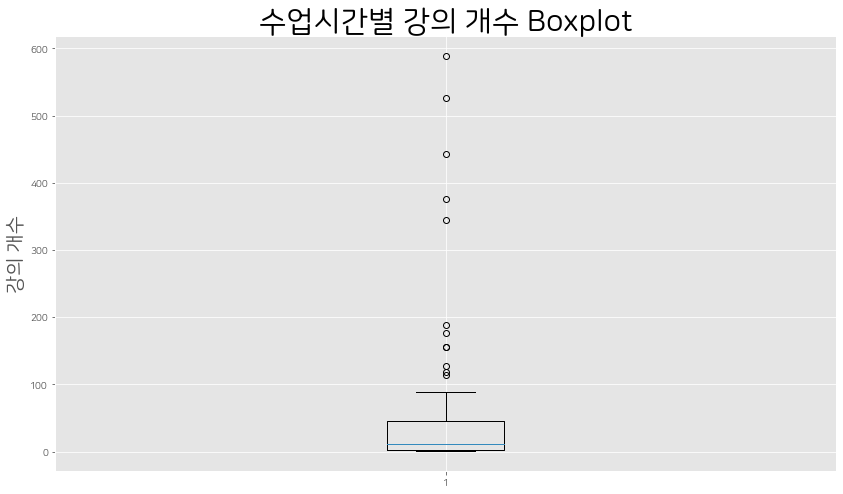

In [ ]:
# 수업시간별 강의 개수 시각화(boxplot)
plt.figure()
plt.boxplot(lecture_num_df['강의 개수'])
plt.title('수업시간별 강의 개수 Boxplot')
plt.ylabel('강의 개수')
plt.show()

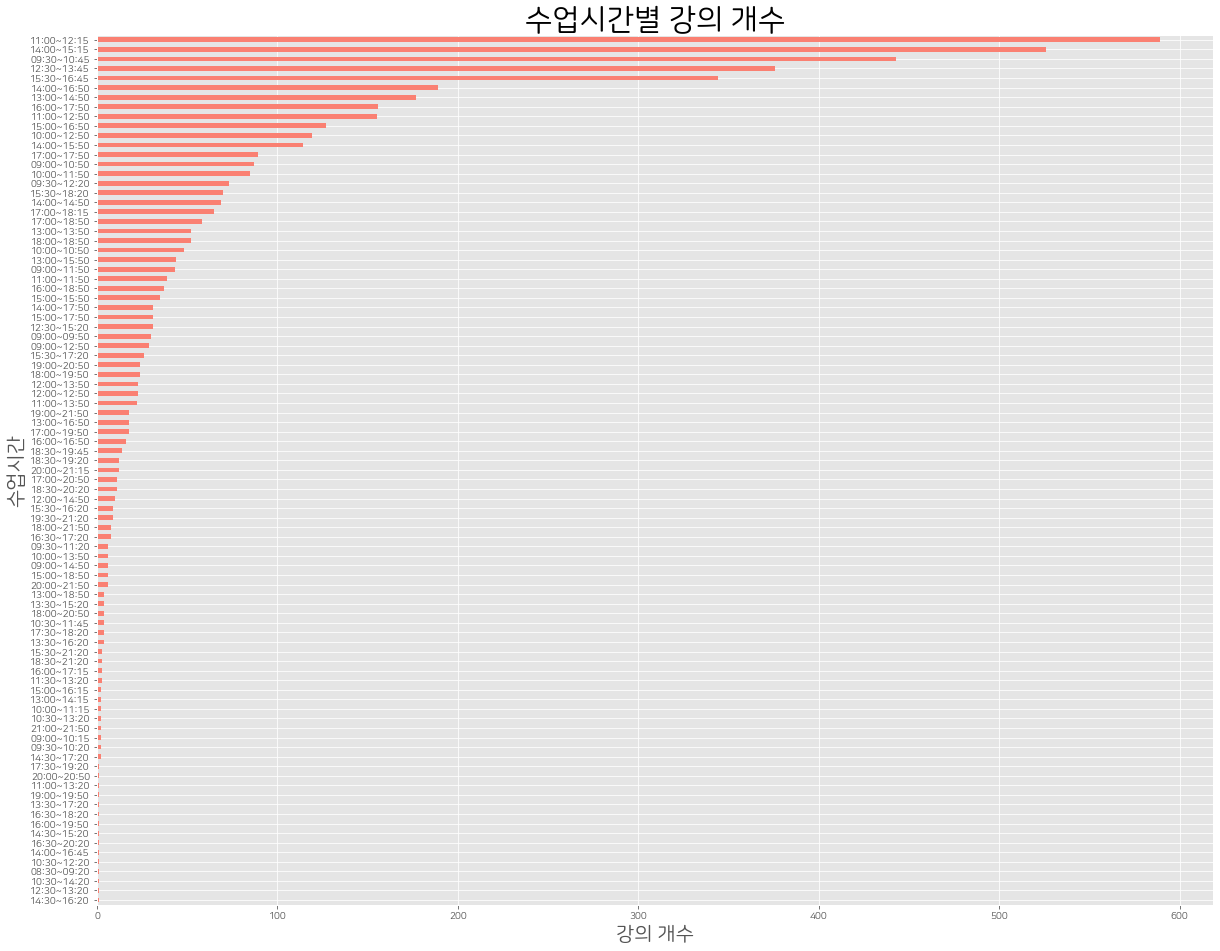

In [ ]:
# 수업시간별 강의 개수 시각화(barplot)
plt.figure(figsize=(20,16))
lecture_num_df['강의 개수'].plot(kind='barh',color='salmon')
plt.title('수업시간별 강의 개수')
plt.xlabel('강의 개수')
plt.ylabel('수업시간')
plt.show()

그 결과 `11:00~12:15`에 해당하는 강의가 가장 많았고, 그 다음으로는 `14:00~15:15`, `09:30~10:45` 순으로 강의 개수가 많았습니다.

## 정원별

In [ ]:
# 정원별 강의 개수 확인
df['정원'].value_counts()

40     475
20     458
30     389
50     259
60     258
25     206
15     159
80     116
10     107
100     95
16      43
12      34
35      33
70      33
8       28
18      28
21      25
5       24
120     22
150     15
24      15
9       13
200     11
90      10
22       9
130      8
7        7
14       7
140      6
180      5
19       4
45       4
75       4
250      3
110      3
13       2
23       2
26       2
55       2
28       2
85       1
38       1
44       1
64       1
77       1
220      1
240      1
330      1
17       1
33       1
41       1
65       1
2        1
Name: 정원, dtype: int64

In [ ]:
# 정원별 강의 개수 기술 통계량 확인
df['정원'].value_counts().describe()

count     53.000000
mean      55.452830
std      113.400679
min        1.000000
25%        2.000000
50%        7.000000
75%       33.000000
max      475.000000
Name: 정원, dtype: float64

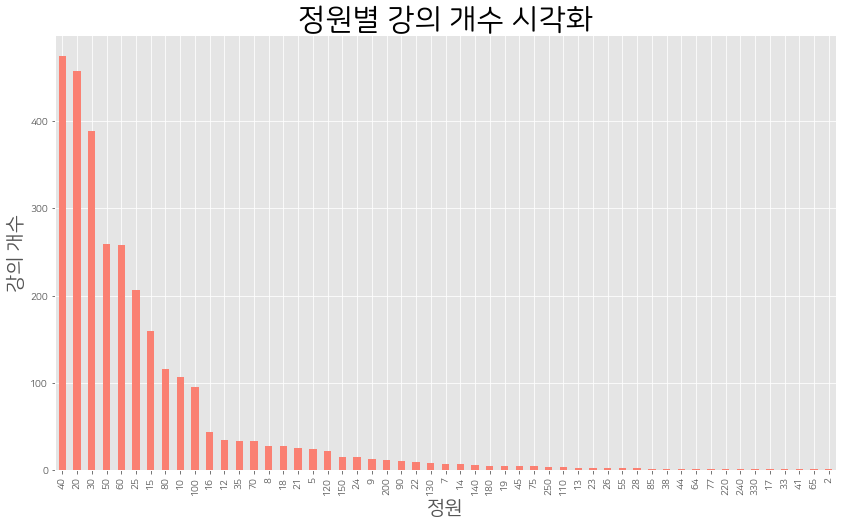

In [ ]:
# 정원별 강의 개수 시각화(barplot)
plt.figure()
df['정원'].value_counts().plot(kind='bar',color='salmon')
plt.title('정원별 강의 개수 시각화')
plt.xlabel('정원')
plt.ylabel('강의 개수')
plt.show()

정원별 강의 개수를 확인한 뒤 이를 막대그래프로 시각화해보았습니다. 정원이 40명인 강의가 475개로 가장 많았고, 그 뒤로는 20명, 30명, 50명 정원인 강의가 많았습니다.

In [ ]:
# 정원별 수업교시별 강의 개수
df.groupby(['정원','수업교시']).count().sort_values(by='교과구분',ascending=False)

교과구분  개설대학  이수과정  ...  수업횟수  수업시간  수업요일_unique
정원  수업교시                                             ...                         
40  화(11:00~12:15)/목(11:00~12:15)    33    33    33  ...    33    33           33
60  월(11:00~12:15)/수(11:00~12:15)    27    27    27  ...    27    27           27
40  월(11:00~12:15)/수(11:00~12:15)    26    26    26  ...    26    26           26
    화(14:00~15:15)/목(14:00~15:15)    24    24    24  ...    24    24           24
    월(09:30~10:45)/수(09:30~10:45)    22    22    22  ...    22    22           22
...                                 ...   ...   ...  ...   ...   ...          ...
24  목(14:00~14:50)/목(15:00~17:50)     1     1     1  ...     1     1            1
    수(13:00~13:50)/수(14:00~15:50)     1     1     1  ...     1     1            1
    수(13:00~15:50)                    1     1     1  ...     1     1            1
    수(14:00~15:50)/수(16:00~17:50)     1     1     1  ...     1     1            1
330 월(17:00~18:15)                    1     1     1  ...     1     1            1

[1278 rows x 13 columns]

정원별 수업교시별 강의 개수를 확인해본 결과, 정원별 수업교시별 범주의 수가 1278개임을 확인할 수 있었습니다. 정원, 수업교시별로 `groupby`해보니 정원이 40명이고 화/목 오전 11시에 시작하는 강의의 개수가 가장 많음을 확인할 수 있었습니다.
정원별 수업교시별 범주의 개수가 너무 많아 이를 막대그래프로 시각화하기는 무리가 있으며 간단히 기술통계량 확인 및 히스토그램, `boxplot`으로 시각화해보고자 합니다.

In [ ]:
# 정원별 수업교시별 강의 개수 범주별 개수 확인
df.groupby(['정원','수업교시']).count()['이수과정'].value_counts()

1     816
2     201
3      87
4      38
5      26
6      23
8      16
7      11
9      10
10     10
11      6
16      5
14      5
12      5
13      4
15      3
21      3
20      2
27      1
18      1
19      1
22      1
24      1
26      1
33      1
Name: 이수과정, dtype: int64

In [ ]:
# 정원별 수업교시별 강의 개수 범주별 상대도수 확인
df.groupby(['정원','수업교시']).count()['이수과정'].value_counts(normalize=True)

1     0.638498
2     0.157277
3     0.068075
4     0.029734
5     0.020344
6     0.017997
8     0.012520
7     0.008607
9     0.007825
10    0.007825
11    0.004695
16    0.003912
14    0.003912
12    0.003912
13    0.003130
15    0.002347
21    0.002347
20    0.001565
27    0.000782
18    0.000782
19    0.000782
22    0.000782
24    0.000782
26    0.000782
33    0.000782
Name: 이수과정, dtype: float64

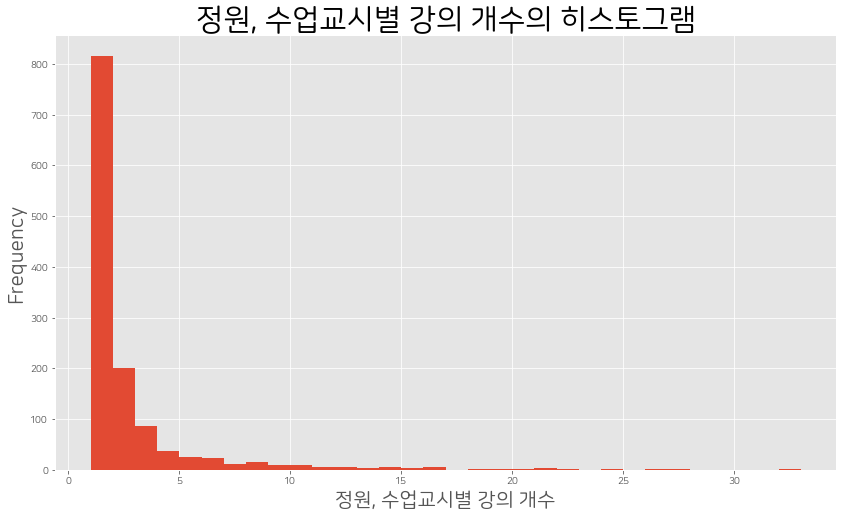

In [ ]:
# 정원별 수업교시별 강의 개수 시각화(histogram)
plt.figure()
df.groupby(['정원','수업교시']).count()['이수과정'].plot(kind='hist',bins=32)
plt.title('정원, 수업교시별 강의 개수의 히스토그램')
plt.xlabel('정원, 수업교시별 강의 개수')
plt.show()

정원별 수업교시별 강의 개수를 히스토그램으로 시각화해본 결과 강의 개수가 1개인 경우가 816개로 약 63.8%를 차지하고 있음을 확인했습니다. 

In [ ]:
# 정원별 수업교시별 강의 개수 기술통계량 확인
df.groupby(['정원','수업교시']).count()['교과구분'].describe()

count    1278.000000
mean        2.299687
std         3.131448
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        33.000000
Name: 교과구분, dtype: float64

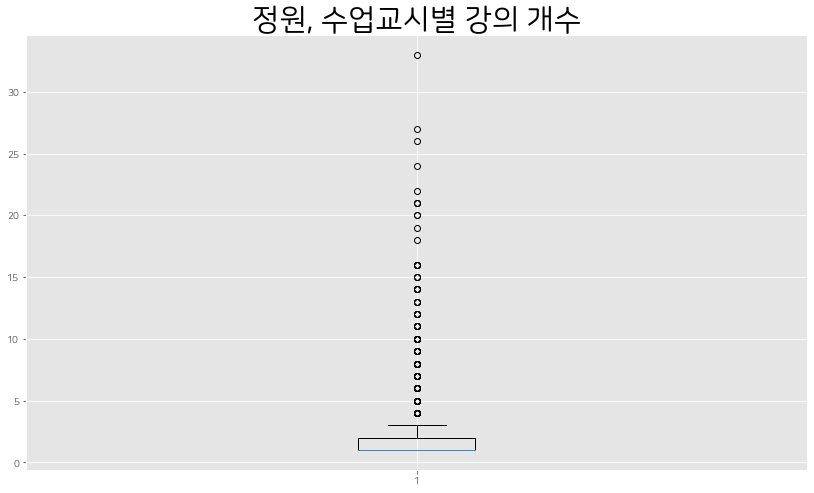

In [ ]:
# 정원별 수업교시별 강의 개수 시각화(boxplot)
plt.figure()
plt.boxplot(df.groupby(['정원','수업교시']).count()['이수과정'])
plt.title('정원, 수업교시별 강의 개수')
plt.show()

위에서 정원 별 수업교시의 강의 수가 1개인 경우가 63.8%임을 확인한 것과 같이, 
박스플롯 그래프를 통해서도 정원 별 수업교시 강의수가 대부분 1의 값을 지녀 그래프가 아래쪽에 위치함을 확인할 수 있습니다.

## 수강신청인원별

In [ ]:
# 수강신청인원별 강의 개수 확인
df['수강신청인원'].value_counts()

20     113
10     106
22     100
21      98
25      94
      ... 
150      1
241      1
109      1
270      1
293      1
Name: 수강신청인원, Length: 140, dtype: int64

In [ ]:
# 수강신청인원별 강의 개수 기술 통계량 확인
df['수강신청인원'].value_counts().describe()

count    140.000000
mean      20.992857
std       29.798966
min        1.000000
25%        2.000000
50%        6.500000
75%       25.000000
max      113.000000
Name: 수강신청인원, dtype: float64

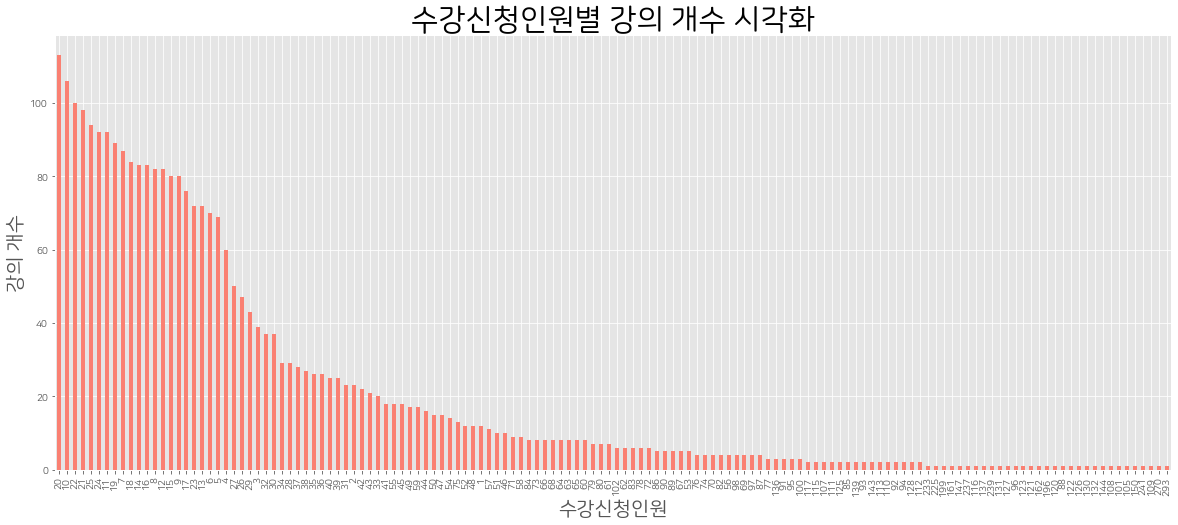

In [ ]:
# 수강신청인원별 강의 개수 시각화(barplot)
plt.figure(figsize=(20,8))
df['수강신청인원'].value_counts().plot(kind='bar',color='salmon')
plt.title('수강신청인원별 강의 개수 시각화')
plt.xlabel('수강신청인원')
plt.ylabel('강의 개수')
plt.show()

수강신청인원별 강의 개수를 확인한 뒤 이를 막대그래프로 시각화해보았습니다. 수강신청인원이 20명인 강의가 113개로 가장 많았고, 그 뒤로는 10명, 22명, 21명이 수강신청한 강의가 많았습니다.

In [ ]:
# 수강신청인원과 정원의 상관계수
df['수강신청인원'].corr(df['정원'])

0.7984847199922184

<Figure size 1008x576 with 0 Axes>

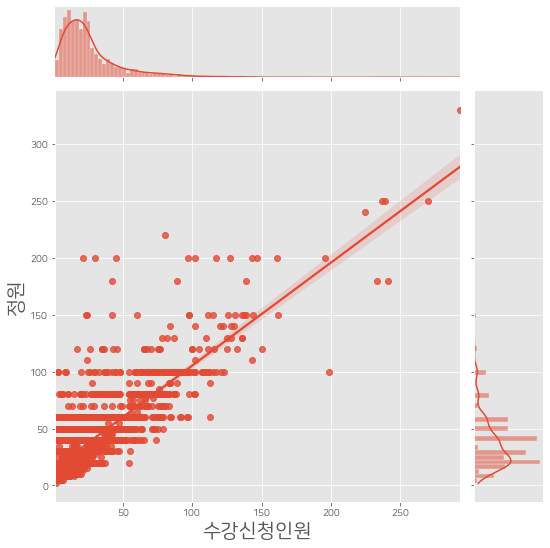

In [ ]:
# 수강신청인원과 정원 시각화(jointplot)
plt.figure()
g = sns.jointplot (x='수강신청인원', y='정원', kind='reg', data=df)
g.fig.set_figwidth(8)
g.fig.set_figheight(8)
plt.show()

수강신청인원과 정원의 상관계수를 구한 결과, 약 0.80정도로 높은 양의 상관관계를 보임을 알 수 있었습니다. 두 컬럼을 `sns.jointplot`으로 시각화해본 결과 두 값모두 오른쪽으로 꼬리가 긴 분포를 보이고 있으며 양의 선형관계가 있음을 확인할 수 있었습니다.